In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:18px;}
</style>
"""))

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 안 보이게
# warnings.filterwarnings(action='default') # 경고 메세지 보이게

# 2. 데이터 다운받아, 서울과 부산데이터만 df변수에 읽어온다

In [3]:
%ls D:\ai\Downloads\shareData\상가정보

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2D0E-15FE

 D:\ai\Downloads\shareData\상가정보 디렉터리

2024-11-18  오후 04:19    <DIR>          .
2024-11-18  오후 04:19    <DIR>          ..
2024-10-23  오후 05:59             1,011 [필독]파일열람방법.txt
2024-10-23  오후 06:19        53,454,658 소상공인시장진흥공단_상가(상권)정보_강원_202409.csv
2024-10-23  오후 06:19       301,935,950 소상공인시장진흥공단_상가(상권)정보_경기_202409.csv
2024-10-23  오후 06:20        86,291,699 소상공인시장진흥공단_상가(상권)정보_경남_202409.csv
2024-10-23  오후 06:20        70,952,897 소상공인시장진흥공단_상가(상권)정보_경북_202409.csv
2024-10-23  오후 06:20        36,458,714 소상공인시장진흥공단_상가(상권)정보_광주_202409.csv
2024-10-23  오후 06:20        57,391,847 소상공인시장진흥공단_상가(상권)정보_대구_202409.csv
2024-10-23  오후 06:20        36,638,904 소상공인시장진흥공단_상가(상권)정보_대전_202409.csv
2024-10-23  오후 06:20        78,253,942 소상공인시장진흥공단_상가(상권)정보_부산_202409.csv
2024-10-23  오후 06:18       254,255,270 소상공인시장진흥공단_상가(상권)정보_서울_202409.csv
2024-10-23  오후 06:18         8,277,492 소상공인시장진흥공단_상가(상권)정보_세종_202409.csv
2024-10-23  오후 06:18        26,299,042 소상공인시장진흥공단

In [4]:
# 서울 소상공인 데이터
df_seoul = pd.read_csv('D:/ai/Downloads/shareData/상가정보/소상공인시장진흥공단_상가(상권)정보_서울_202409.csv',
                      low_memory=False,
                      #encoding='UTF8'
                      )
# low_memory=False : 대용량 데이터를 불어오는 경우 
df_seoul.shape

(466022, 39)

In [6]:
df_seoul.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117


In [7]:
pd.options.display.max_columns

20

In [9]:
pd.options.display.max_columns = 39
df_seoul.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,사진 처리업,11,서울특별시,11470,양천구,11470600,신월5동,1147010300,신월동,1147010300100090004,1,대지,9,4.0,서울특별시 양천구 신월동 9-4,1.147030e+11,서울특별시 양천구 월정로,283.0,NaN,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
1,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11500,강서구,11500603,가양1동,1150010500,마곡동,1150010500107740012,1,대지,774,12.0,서울특별시 강서구 마곡동 774-12,1.150032e+11,서울특별시 강서구 마곡동로,55.0,NaN,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


In [10]:
# 부산 소상공인 데이터
df_pusan = pd.read_csv(r'D:\ai\Downloads\shareData\상가정보\소상공인시장진흥공단_상가(상권)정보_부산_202409.csv',
                      #encoding='UTF-8'
                      ) 
df_pusan.shape

(143964, 39)

In [11]:
df_pusan.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220805430814,리스트,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,여자용 겉옷 소매업,26,부산광역시,26440,강서구,26440535,명지1동,2644010400,명지동,2644010400134380000,1,대지,3438.0,NaN,부산광역시 강서구 명지동 3438,2.644034e+11,부산광역시 강서구 명지국제6로,168.0,NaN,2644010400134380000000001,스타필드시티명지점,부산광역시 강서구 명지국제6로 168,618200,46772,NaN,2,NaN,128.918174,35.093125
1,MA010120220805430900,눈썹그리기교실동안눈썹,NaN,S2,수리·개인,S207,이용·미용,S20702,피부 관리실,S96113,피부 미용업,26,부산광역시,26320,북구,26320543,화명3동,2632010200,화명동,2632010200122720005,1,대지,2272.0,5.0,부산광역시 북구 화명동 2272-5,2.632021e+11,부산광역시 북구 화명대로,31.0,NaN,2632010200122720005015331,현호타워,부산광역시 북구 화명대로 31,616852,46525,NaN,NaN,NaN,129.011641,35.235217


In [12]:
print(df_seoul.columns)
print(df_pusan.columns)

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')
Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


In [13]:
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466022 entries, 0 to 466021
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     466022 non-null  object 
 1   상호명        466022 non-null  object 
 2   지점명        11406 non-null   object 
 3   상권업종대분류코드  466022 non-null  object 
 4   상권업종대분류명   466022 non-null  object 
 5   상권업종중분류코드  466022 non-null  object 
 6   상권업종중분류명   466022 non-null  object 
 7   상권업종소분류코드  466022 non-null  object 
 8   상권업종소분류명   466022 non-null  object 
 9   표준산업분류코드   465931 non-null  object 
 10  표준산업분류명    465931 non-null  object 
 11  시도코드       466022 non-null  int64  
 12  시도명        466022 non-null  object 
 13  시군구코드      466022 non-null  int64  
 14  시군구명       466022 non-null  object 
 15  행정동코드      466022 non-null  int64  
 16  행정동명       466022 non-null  object 
 17  법정동코드      466022 non-null  int64  
 18  법정동명       466022 non-null  object 
 19  지번코드       466022 non-n

In [14]:
df_seoul.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [15]:
df_pusan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143964 entries, 0 to 143963
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     143964 non-null  object 
 1   상호명        143963 non-null  object 
 2   지점명        3666 non-null    object 
 3   상권업종대분류코드  143964 non-null  object 
 4   상권업종대분류명   143964 non-null  object 
 5   상권업종중분류코드  143964 non-null  object 
 6   상권업종중분류명   143964 non-null  object 
 7   상권업종소분류코드  143964 non-null  object 
 8   상권업종소분류명   143964 non-null  object 
 9   표준산업분류코드   143930 non-null  object 
 10  표준산업분류명    143930 non-null  object 
 11  시도코드       143964 non-null  int64  
 12  시도명        143964 non-null  object 
 13  시군구코드      143964 non-null  int64  
 14  시군구명       143964 non-null  object 
 15  행정동코드      143964 non-null  int64  
 16  행정동명       143964 non-null  object 
 17  법정동코드      143964 non-null  int64  
 18  법정동명       143964 non-null  object 
 19  지번코드       143964 non-n

In [16]:
df_pusan.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지        float64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [21]:
# 부산데이터와 서울데이터 컬럼명들 확인
np.all(df_seoul.columns == df_pusan.columns)

True

In [22]:
# 부산데이터와 서울데이터의 타입들 확인
np.all(df_seoul.dtypes == df_pusan.dtypes)

False

In [23]:
df_seoul.dtypes == df_pusan.dtypes

상가업소번호        True
상호명           True
지점명           True
상권업종대분류코드     True
상권업종대분류명      True
상권업종중분류코드     True
상권업종중분류명      True
상권업종소분류코드     True
상권업종소분류명      True
표준산업분류코드      True
표준산업분류명       True
시도코드          True
시도명           True
시군구코드         True
시군구명          True
행정동코드         True
행정동명          True
법정동코드         True
법정동명          True
지번코드          True
대지구분코드        True
대지구분명         True
지번본번지        False
지번부번지         True
지번주소          True
도로명코드         True
도로명           True
건물본번지         True
건물부번지         True
건물관리번호        True
건물명           True
도로명주소         True
구우편번호         True
신우편번호         True
동정보           True
층정보           True
호정보           True
경도            True
위도            True
dtype: bool

In [25]:
df_seoul['지번본번지'].head()

0      9
1    774
2    143
3    100
4    684
Name: 지번본번지, dtype: int64

In [26]:
df_pusan['지번본번지'].head()

0    3438.0
1    2272.0
2      30.0
3     398.0
4     867.0
Name: 지번본번지, dtype: float64

In [29]:
df = pd.concat([df_seoul, df_pusan])
df.shape

(609986, 39)

In [30]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            143954, 143955, 143956, 143957, 143958, 143959, 143960, 143961,
            143962, 143963],
           dtype='int64', length=609986)

In [31]:
df_seoul.index

RangeIndex(start=0, stop=466022, step=1)

In [32]:
df_pusan.index

RangeIndex(start=0, stop=143964, step=1)

In [38]:
df.loc[[0],['상호명','시도명','위도','경도']]

,상호명,시도명,위도,경도
0,이상한스냅,서울특별시,37.542117,126.828832
0,리스트,부산광역시,35.093125,128.918174


In [42]:
# concat 후 인덱스 정리
# df.index = range(df.shape[0])
df.reset_index(drop=True, inplace=True)
df.index

RangeIndex(start=0, stop=609986, step=1)

In [43]:
# 현재 주피터 노트북이 쓰고 있는 메모리 용량

In [44]:
%load_ext memory_profiler
%memit

peak memory: 1174.81 MiB, increment: 0.09 MiB


In [45]:
del df_seoul, df_pusan

In [46]:
%load_ext memory_profiler
%memit

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 1174.82 MiB, increment: 0.00 MiB


# 3. df 데이터 셋의 결측치 및 시각화
## ① df 변수의 컬럼들을 확인하고 상위 3줄, 하위3줄을 출력한다.

In [51]:
# df 상위 3줄
df.head(3)
df.iloc[:3]
df.loc[[0,1,2]]# df.loc[0:2]
df[0:3]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,사진 처리업,11,서울특별시,11470,양천구,11470600,신월5동,1147010300,신월동,1147010300100090004,1,대지,9.0,4.0,서울특별시 양천구 신월동 9-4,1.147030e+11,서울특별시 양천구 월정로,283.0,NaN,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
1,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11500,강서구,11500603,가양1동,1150010500,마곡동,1150010500107740012,1,대지,774.0,12.0,서울특별시 강서구 마곡동 774-12,1.150032e+11,서울특별시 강서구 마곡동로,55.0,NaN,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053
2,MA010120220805430797,가배차,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11710,송파구,11710580,송파1동,1171010400,송파동,1171010400101430002,1,대지,143.0,2.0,서울특별시 송파구 송파동 143-2,1.171031e+11,서울특별시 송파구 가락로,209.0,NaN,1171010400101430002012823,사이언스빌딩,서울특별시 송파구 가락로 209,138852,5663,NaN,1,NaN,127.116136,37.507170


In [55]:
# 하위 3줄
df.tail(3)
df.iloc[-3:]
df[-3:]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
609983,MA0101202406A0471221,웰컴투뮤즈월드,NaN,P1,교육,P107,교육 지원,P10701,교육컨설팅업,P85701,교육관련 자문 및 평가업,26,부산광역시,26230,부산진구,26230520,부전2동,2623010300,부전동,2623010300102260001,1,대지,226.0,1.0,부산광역시 부산진구 부전동 226-1,2.623042e+11,부산광역시 부산진구 중앙대로680번길,22.0,NaN,2623010300102260001005883,NaN,부산광역시 부산진구 중앙대로680번길 22,614846,47296,NaN,NaN,NaN,129.060463,35.153214
609984,MA0101202406A0497602,슈아브,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,26,부산광역시,26140,서구,26140630,초장동,2614011900,초장동,2614011900100540003,1,대지,54.0,3.0,부산광역시 서구 초장동 54-3,2.614030e+11,부산광역시 서구 구덕로,147.0,NaN,2614011900100540003000245,NaN,부산광역시 서구 구덕로 147,602834,49245,NaN,2,NaN,129.020472,35.097986
609985,MA0101202406A0470616,공동법률사무소문정,NaN,M1,과학·기술,M103,법무관련,M10301,변호사,M71101,변호사업,26,부산광역시,26470,연제구,26470610,거제1동,2647010100,거제동,2647010100114920003,1,대지,1492.0,3.0,부산광역시 연제구 거제동 1492-3,2.647042e+11,부산광역시 연제구 법원남로15번길,12.0,NaN,2647010100114920003019273,대한타워빌딩,부산광역시 연제구 법원남로15번길 12,611730,47511,NaN,7,NaN,129.073684,35.190460


## ②	df 변수의 결측치를 제외한 데이터 개수 및 dtype들을 출력(dtypes함수)하고 변수가 사용되는 메모리 사용량 확인한다.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609986 entries, 0 to 609985
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     609986 non-null  object 
 1   상호명        609985 non-null  object 
 2   지점명        15072 non-null   object 
 3   상권업종대분류코드  609986 non-null  object 
 4   상권업종대분류명   609986 non-null  object 
 5   상권업종중분류코드  609986 non-null  object 
 6   상권업종중분류명   609986 non-null  object 
 7   상권업종소분류코드  609986 non-null  object 
 8   상권업종소분류명   609986 non-null  object 
 9   표준산업분류코드   609861 non-null  object 
 10  표준산업분류명    609861 non-null  object 
 11  시도코드       609986 non-null  int64  
 12  시도명        609986 non-null  object 
 13  시군구코드      609986 non-null  int64  
 14  시군구명       609986 non-null  object 
 15  행정동코드      609986 non-null  int64  
 16  행정동명       609986 non-null  object 
 17  법정동코드      609986 non-null  int64  
 18  법정동명       609986 non-null  object 
 19  지번코드       609986 non-n

## ③	결측치를 확인하고 결측치가 없는 컬럼을 포함하여 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot)

In [59]:
# 열별 결측치 갯수 확인
missing_cnt = df.isna().sum()
missing_cnt

상가업소번호            0
상호명               1
지점명          594914
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드        125
표준산업분류명         125
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             4
지번부번지         92754
지번주소              0
도로명코드            47
도로명               0
건물본번지            48
건물부번지        525475
건물관리번호           35
건물명          339686
도로명주소             0
구우편번호             0
신우편번호             0
동정보          609986
층정보          211021
호정보          609986
경도                0
위도                0
dtype: int64

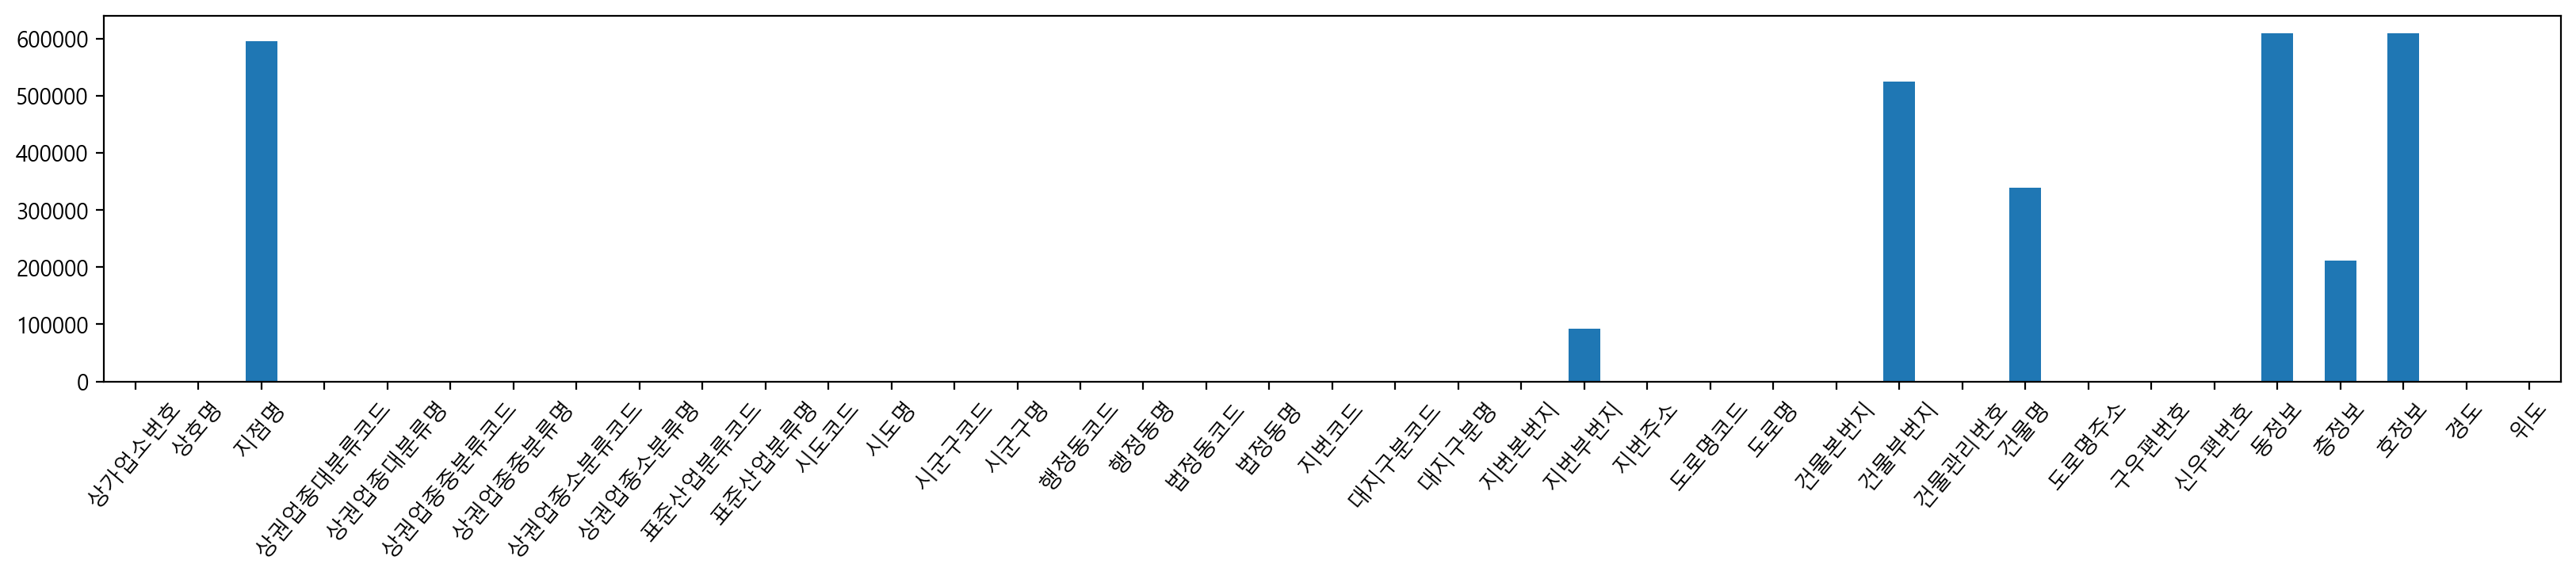

In [65]:
# 결측치를 세로막대그래프(bar)로 시각화
# missing_cnt.plot(kind='bar')
missing_cnt.plot.bar(rot=50, figsize=(20,3))
plt.show()

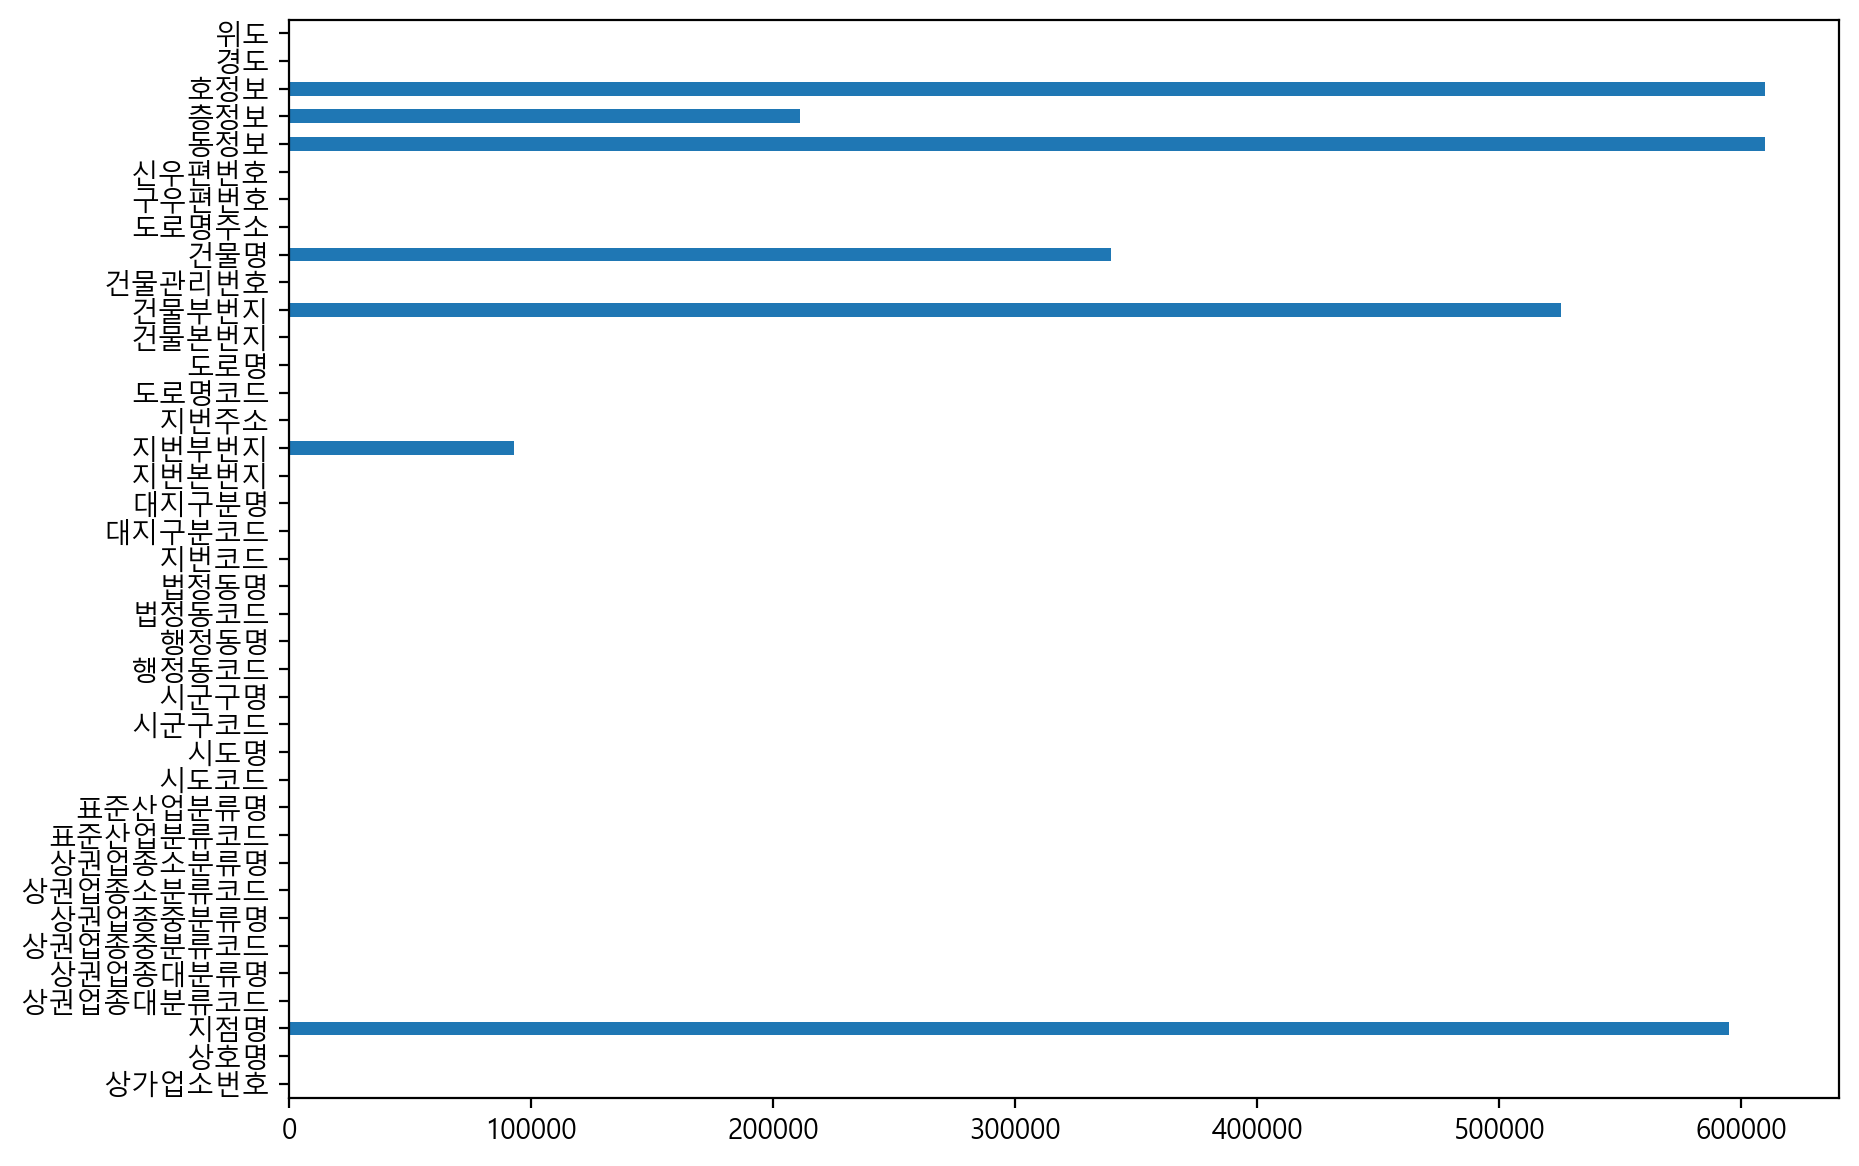

In [70]:
# 결측치를 가로막대그래프(barh)로 시각화
# missing_cnt.plot(kind='barh')
missing_cnt.plot.barh(figsize=(10,7))
plt.show()

In [79]:
missing_cnt_sorted = missing_cnt.sort_values(ascending=False)

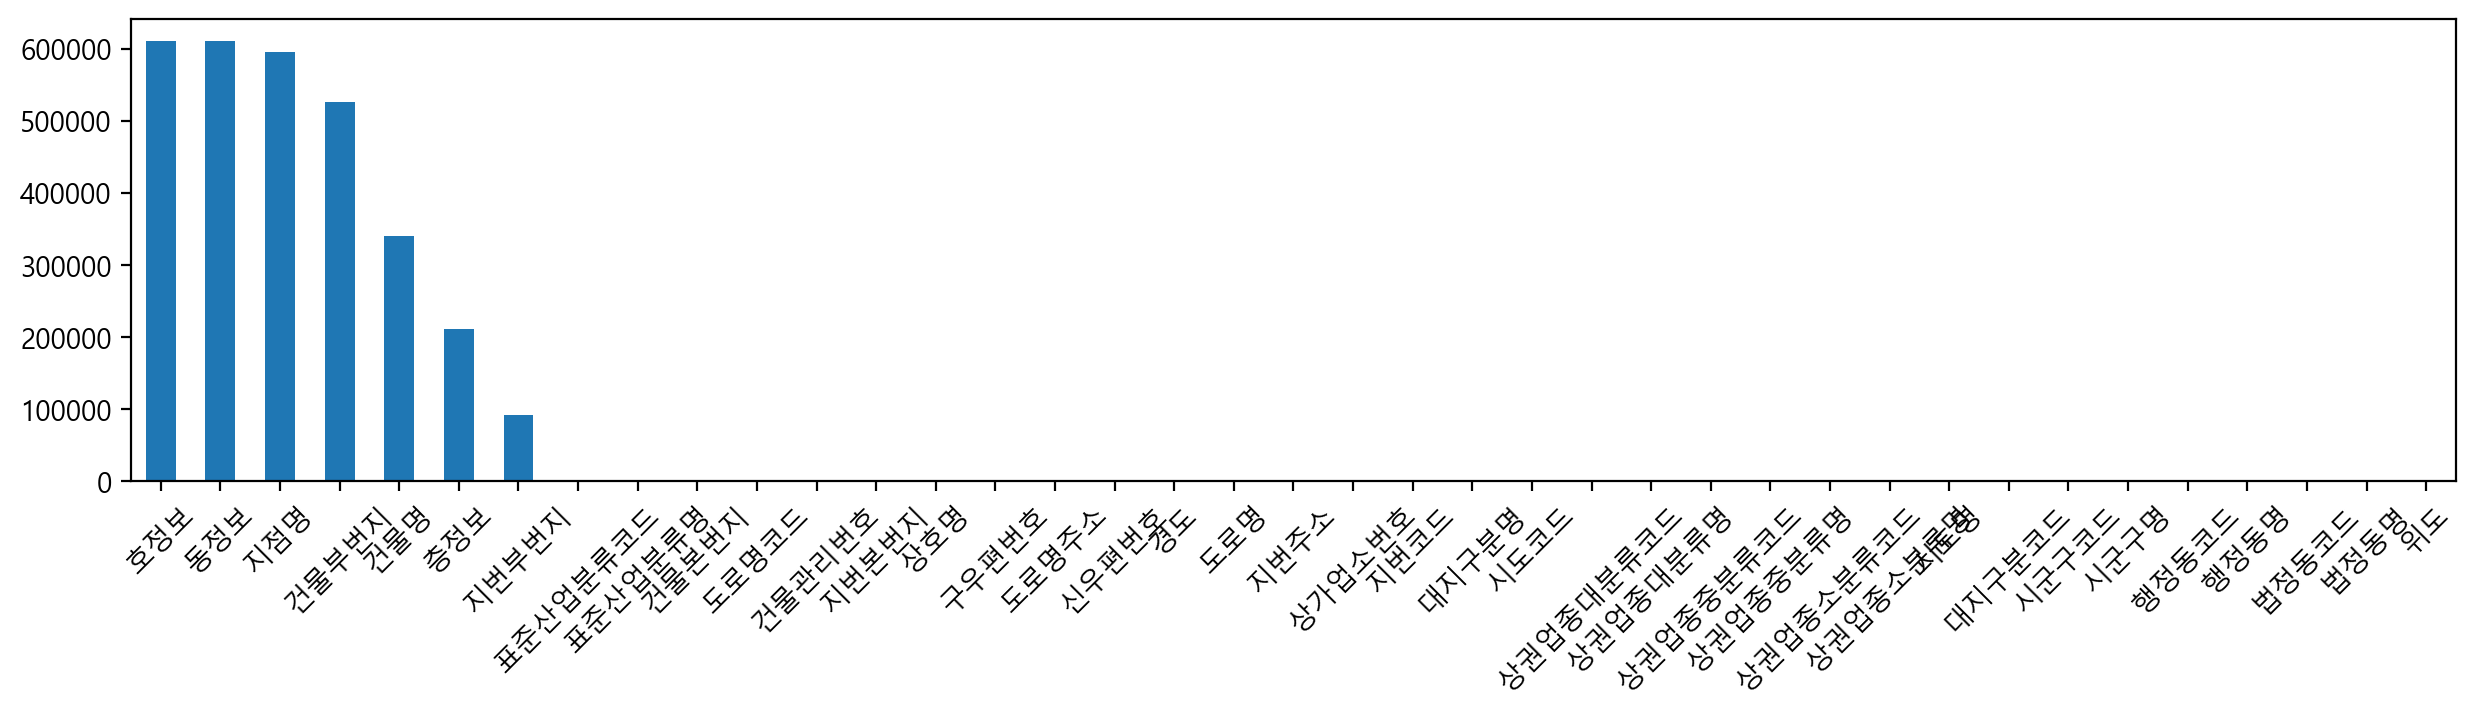

In [76]:
missing_cnt_sorted.plot(kind='bar', rot=45, figsize=(15,3))
plt.show()

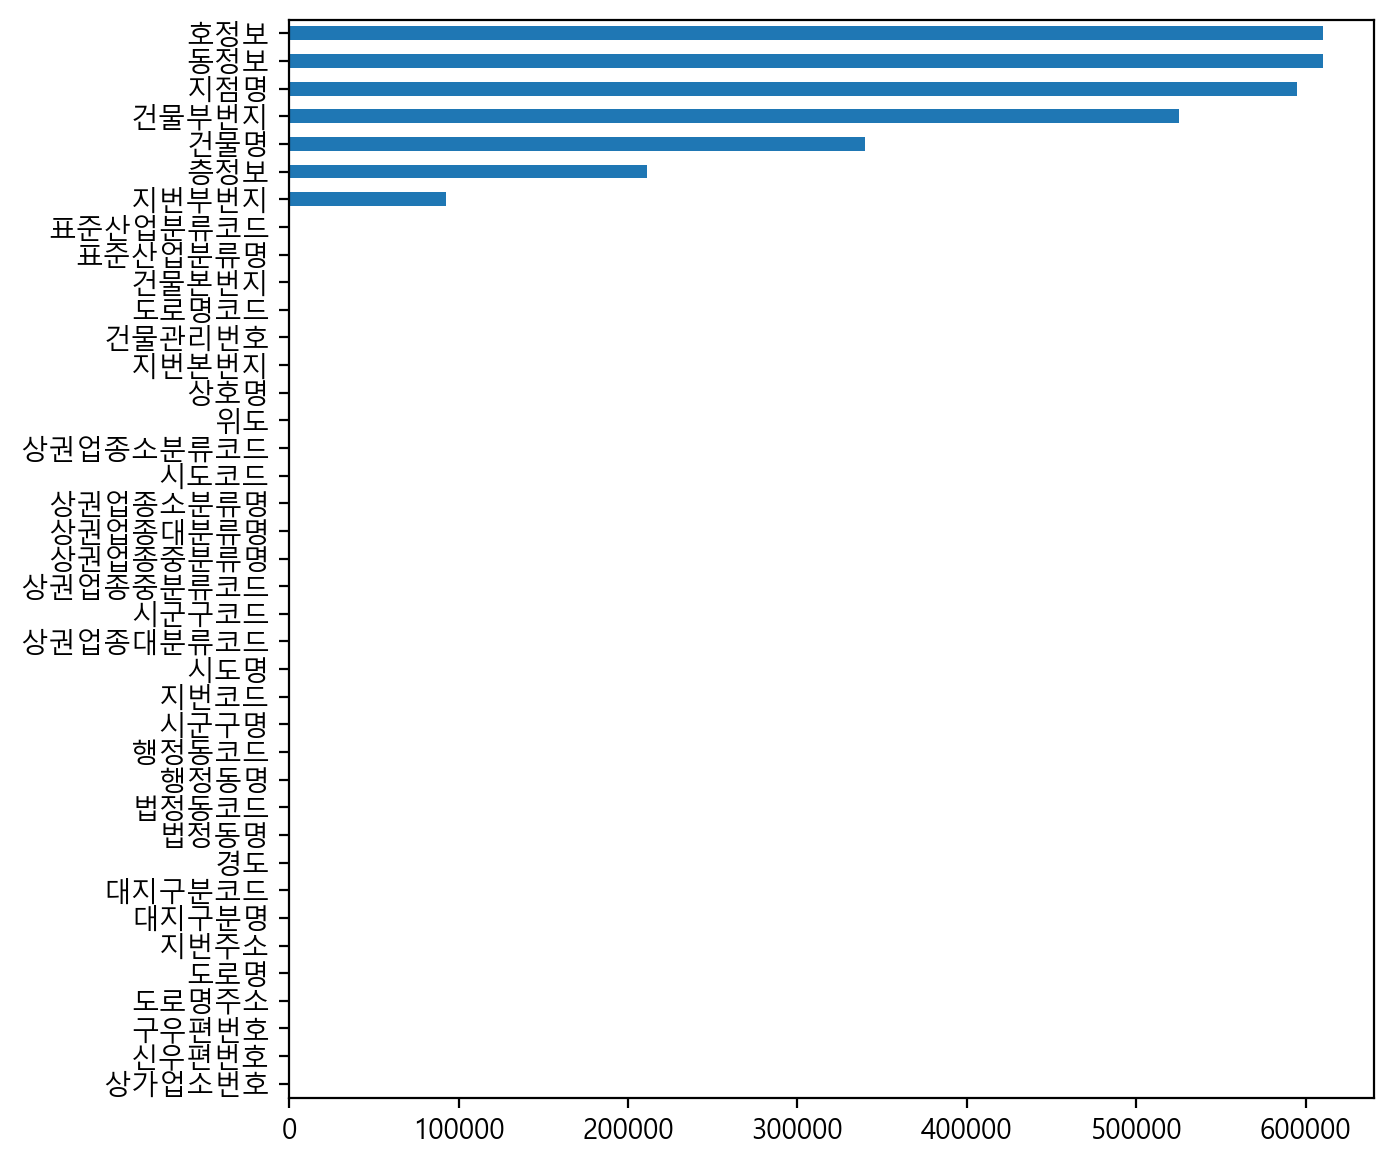

In [81]:
missing_cnt.sort_values().plot(kind='barh', figsize=(7,7))
plt.show()

## ④ 결측치가 없는 컬럼는 제외하고 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot).

In [85]:
# missing_cnt : 열별 결측치 갯수
only_missing_cnt = missing_cnt[missing_cnt!=0]
only_missing_cnt

상호명              1
지점명         594914
표준산업분류코드       125
표준산업분류명        125
지번본번지            4
지번부번지        92754
도로명코드           47
건물본번지           48
건물부번지       525475
건물관리번호          35
건물명         339686
동정보         609986
층정보         211021
호정보         609986
dtype: int64

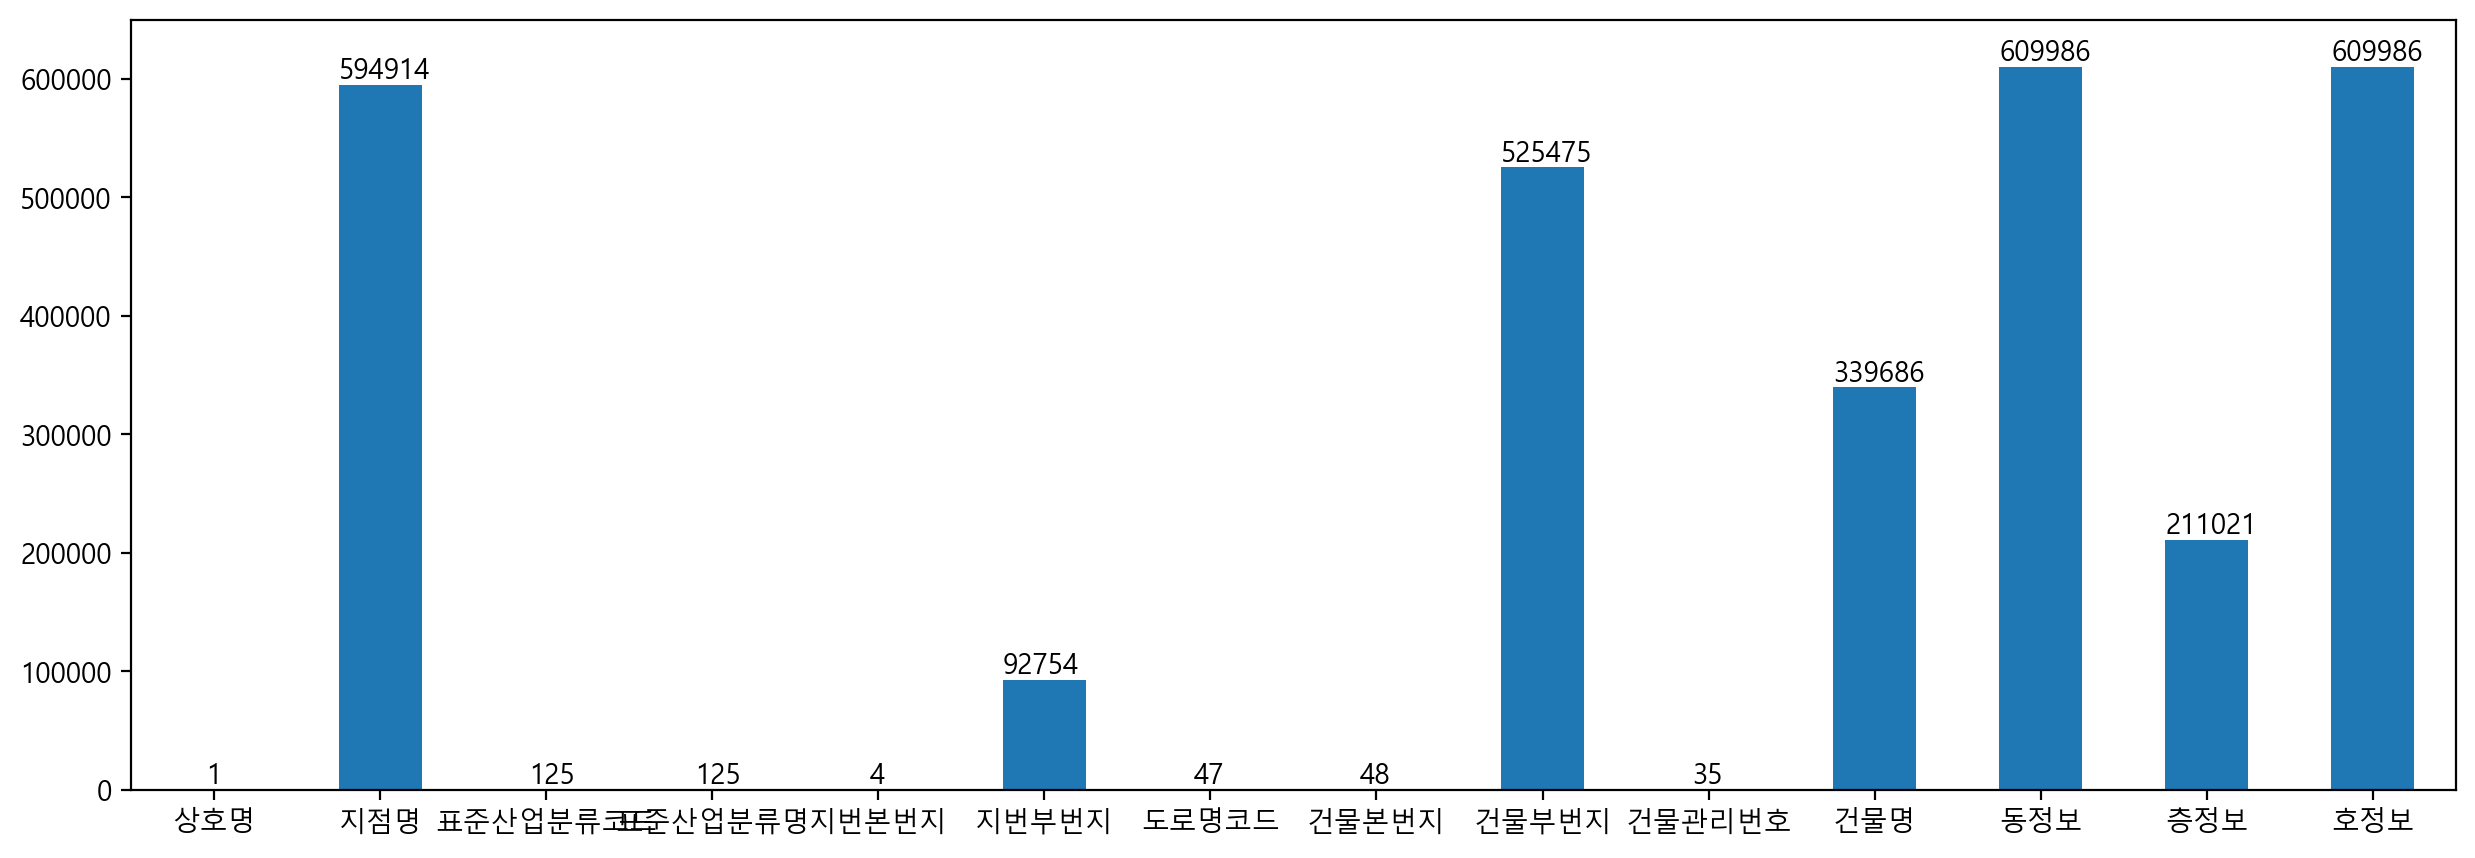

In [113]:
# only_missing_cnt(결측치가 있는 열 갯수)를 barplot
only_missing_cnt.plot.bar(figsize=(15,5), 
                          rot=0,
                          ylim = [0,650000])
for i, v in enumerate(only_missing_cnt):
    if v<10:
        plt.text(i-0.05, v+5000, v)
    elif v<1000 :
        plt.text(i-0.1, v+5000, v)
    else:
        plt.text(i-0.25, v+5000, v)
plt.show()